# **🌐 FIAP GLOBAL SOLUTION 2025 - 2º SEMESTRE**
## 🐍 Dynamic Programing

### **👥 Integrantes (2ESPH):**

```
RM 556197 | Caio Felipe de Lima Bezerra
RM 555490 | Marcos Vinícius da Silva Costa
RM 554736 | Rafael Federici de Oliveira
```

### **🎯 Objetivo do Relatório:**
Implementar, executar e analisar os resultados dos desafios propostos na GS de Dynamic Programming:

- **DESAFIO 01:** Caminho de Valor Máximo
- **DESAFIO 02:** Verificação Crítica
- **DESAFIO 03:** Pivô Mais Rápido
- **DESAFIO 04:** Trilhas Paralelas
- **DESAFIO 05:** Recomendar Próximas Habilidades

## **⬇️ IMPORTS:**

In [48]:
import matplotlib.pyplot as plt
import numpy as np

from data.dados import dic_skills
from desafios.d1.runner import executarDesafio1

## **DESAFIO 01: Caminho de Valor Máximo**

**Objetivo:** Encontrar a sequência de habilidades (do estado atual até S6) que maximize o Valor
Esperado sob restrições T ≤ 350h e Cumulativo de Complexidade C ≤ 30.

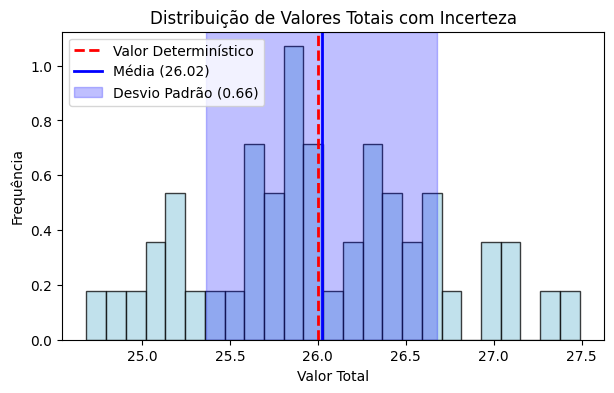

In [49]:
resultado = executarDesafio1(runs=1000, seed=42)

mc = resultado['Calcular_Incerteza']
vals = mc['Amostras']
media = np.mean(vals)
desvio = np.std(vals)
valor_det = resultado['Solucao_Deterministica']['Melhor_Sem_Alvo']['Valor']

plt.figure(figsize=(7, 4))
plt.hist(vals, bins=25, color='lightblue', edgecolor='black', alpha=0.75, density=True)
plt.axvline(valor_det, color='red', linestyle='--', linewidth=2, label=f'Valor Determinístico')
plt.axvline(media, color='blue', linestyle='-', linewidth=2, label=f'Média ({media:.2f})')
plt.axvspan(media - desvio, media + desvio, color='blue', alpha=0.25, label=f'Desvio Padrão ({desvio:.2f})')
plt.title('Distribuição de Valores Totais com Incerteza')
plt.xlabel('Valor Total')
plt.ylabel('Frequência')
plt.legend(loc='upper left')
plt.show()

## **CONCLUSAO - DESAFIO 01**

### RESULTADO DETERMINÍSTICO:

Os algoritmos feitos para o DESAFIO 01 analisaram se era possível atingir a skill S6 (IA Generativa Ética) respeitando certas restrições.

- Tempo ≤ 350 horas
- Complexidade ≤ 30

Porém, o conjunto mínimo para incluir S6 {S1, S3, S4, S6} ultrapassa os limites das restrições. Logo, e impossível incluir S6 na solução ótima.

Assim, fizemos uma solução ótima sem incluir o alvo, que resultou em:

- Valor Total = 26
- Tempo = 340 horas
- Complexidade = 28
- Conjunto = {S1, S2, S5, S7, H10, H12}

### RESULTADO COM INCERTEZA:

A simulação (Monte Carlo) executa 1000 cenários onde cada valor (V) é testado aleatoriamente

```V ​∼ Uniforme (V​−10%, V​+10%)```

Para cada cenário, o valor total do mesmo conjunto ótimo é recalculado.

Isso gera 1000 valores de "Valor Total", formando uma distribuição estatística.

O gráfico mostra que a os "Valores Totais" sob incerteza tem uma variação pequena, com a maior parte das simulações concentrada entre 25,5 e 26,5, confirmando a precisão da solução determinística.